In [3]:
install.packages("remotes")
remotes::install_github("YuLab-SMU/aplot")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'aplot' from a github remote, the SHA1 (c66574aa) has not changed since last install.
  Use `force = TRUE` to force installation



In [4]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(patchwork))
library(parallel)
library(data.table)
library(cowplot)
library(ggsci)
library(aplot)

options(warn=-1)

In [5]:
file_list<-list.files(path = paste0("/home/jupyter/formal_BRIanalysis/DEG_Mehul/Sex_Year1Day0/"), pattern = ".csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

## file_list

In [6]:
DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
DEG<-do.call(rbind,DEG_list)

In [7]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "Up-regulated",
                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated",
                                                     TRUE ~ "Unchanged"))

In [8]:
DEG<-DEG %>% filter(Year=='Y1')

In [9]:
DEG1 <- DEG %>% 
  mutate(Expression = case_when(
    log2FoldChange >= 0.1 & padj <= 0.1 ~ "Up-regulated-Male",
    log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated-Male",
    TRUE ~ "Unchanged"
  ))

In [10]:
DEG_filtered <- DEG1 %>% 
  filter(Expression != "Unchanged")

In [19]:
DEG_filtered

X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,celltype,Direction,Year,Expression
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
RPS4Y1,6.1287377,5.7540965,0.32702470,17.595296,2.676539e-69,1.435428e-65,Activated memory B cell,Male,Y1,Up-regulated-Male
RPS4X,86.3833201,-0.6165749,0.05567046,-11.075440,1.650682e-28,4.426304e-25,Activated memory B cell,Female,Y1,Down-regulated-Male
XIST,1.7405825,-3.9646000,0.37952586,-10.446192,1.525270e-25,2.726675e-22,Activated memory B cell,Female,Y1,Down-regulated-Male
EIF1AY,1.1515887,3.9678401,0.43954973,9.027056,1.763517e-19,2.364436e-16,Activated memory B cell,Male,Y1,Up-regulated-Male
DDX3Y,0.9444416,3.4784032,0.42491623,8.186092,2.698461e-16,2.894369e-13,Activated memory B cell,Male,Y1,Up-regulated-Male
EIF1AX,2.2810632,-1.0086006,0.24574933,-4.104184,4.057436e-05,3.626672e-02,Activated memory B cell,Female,Y1,Down-regulated-Male
RPS4Y1,44.6829286,5.9186275,0.16298176,36.314661,9.497275e-289,4.376344e-285,Adaptive NK cell,Male,Y1,Up-regulated-Male
XIST,23.5890723,-6.4154223,0.18536850,-34.609020,1.848581e-262,4.259130e-259,Adaptive NK cell,Female,Y1,Down-regulated-Male
EIF1AY,4.1072499,4.6844981,0.24302100,19.276104,8.526101e-83,1.309609e-79,Adaptive NK cell,Male,Y1,Up-regulated-Male


In [11]:
freq <- aggregate(cbind(count = celltype) ~ celltype + Expression, data = DEG_filtered, FUN = length)

In [12]:
freq <- freq %>%
  mutate(count = ifelse(Expression == "Down-regulated-Male", -1 * count, count))

In [13]:
#freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.1 ~ "Up-regulated-D0",
#                                                     log2FoldChange <= -0.1 & padj <= 0.1 ~ "Down-regulated-D0",
#                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
#  group_by(celltype, Expression) %>%
#  summarise(count = n())
#freq<-freq %>% mutate (count=case_when(Expression=="Down-regulated-D0"~-count,TRUE~count))

In [14]:
orders<-freq
orders$count<-abs(orders$count)
orders<-orders%>%
  group_by(celltype) %>%
  summarize(value = sum(count))%>%arrange(desc(value)) %>% select (celltype) %>% pull()

In [15]:
options(repr.plot.width = 10, repr.plot.height = 5)
#orders<-unique(freq %>% arrange(desc(count)) %>% select (celltype) %>% pull())
freq$celltype<-factor(freq$celltype,levels=orders)
p1<-ggplot(freq, aes(x = celltype, y = count, fill = Expression)) +
  geom_bar(stat = "identity", position = "identity") +theme_bw(base_size=12)+  scale_fill_aaas()+
  labs(x = "celltype", y = "DEG_Counts") +  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15)) +
  guides(fill = guide_legend(reverse = TRUE))

In [16]:
total_gene <- DEG  %>%
  group_by(celltype) %>%
  summarise(count = n())
total_gene$celltype<-factor(total_gene$celltype,levels=orders)

In [17]:
p2<-ggplot(total_gene, aes(x = celltype, y = count)) +
  geom_bar(stat = "identity", position = "identity") +
  labs(x = "celltype", y = "Total_Genes_Expressed")+theme_bw(base_size=12)+
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())+ylab('N_Genes')

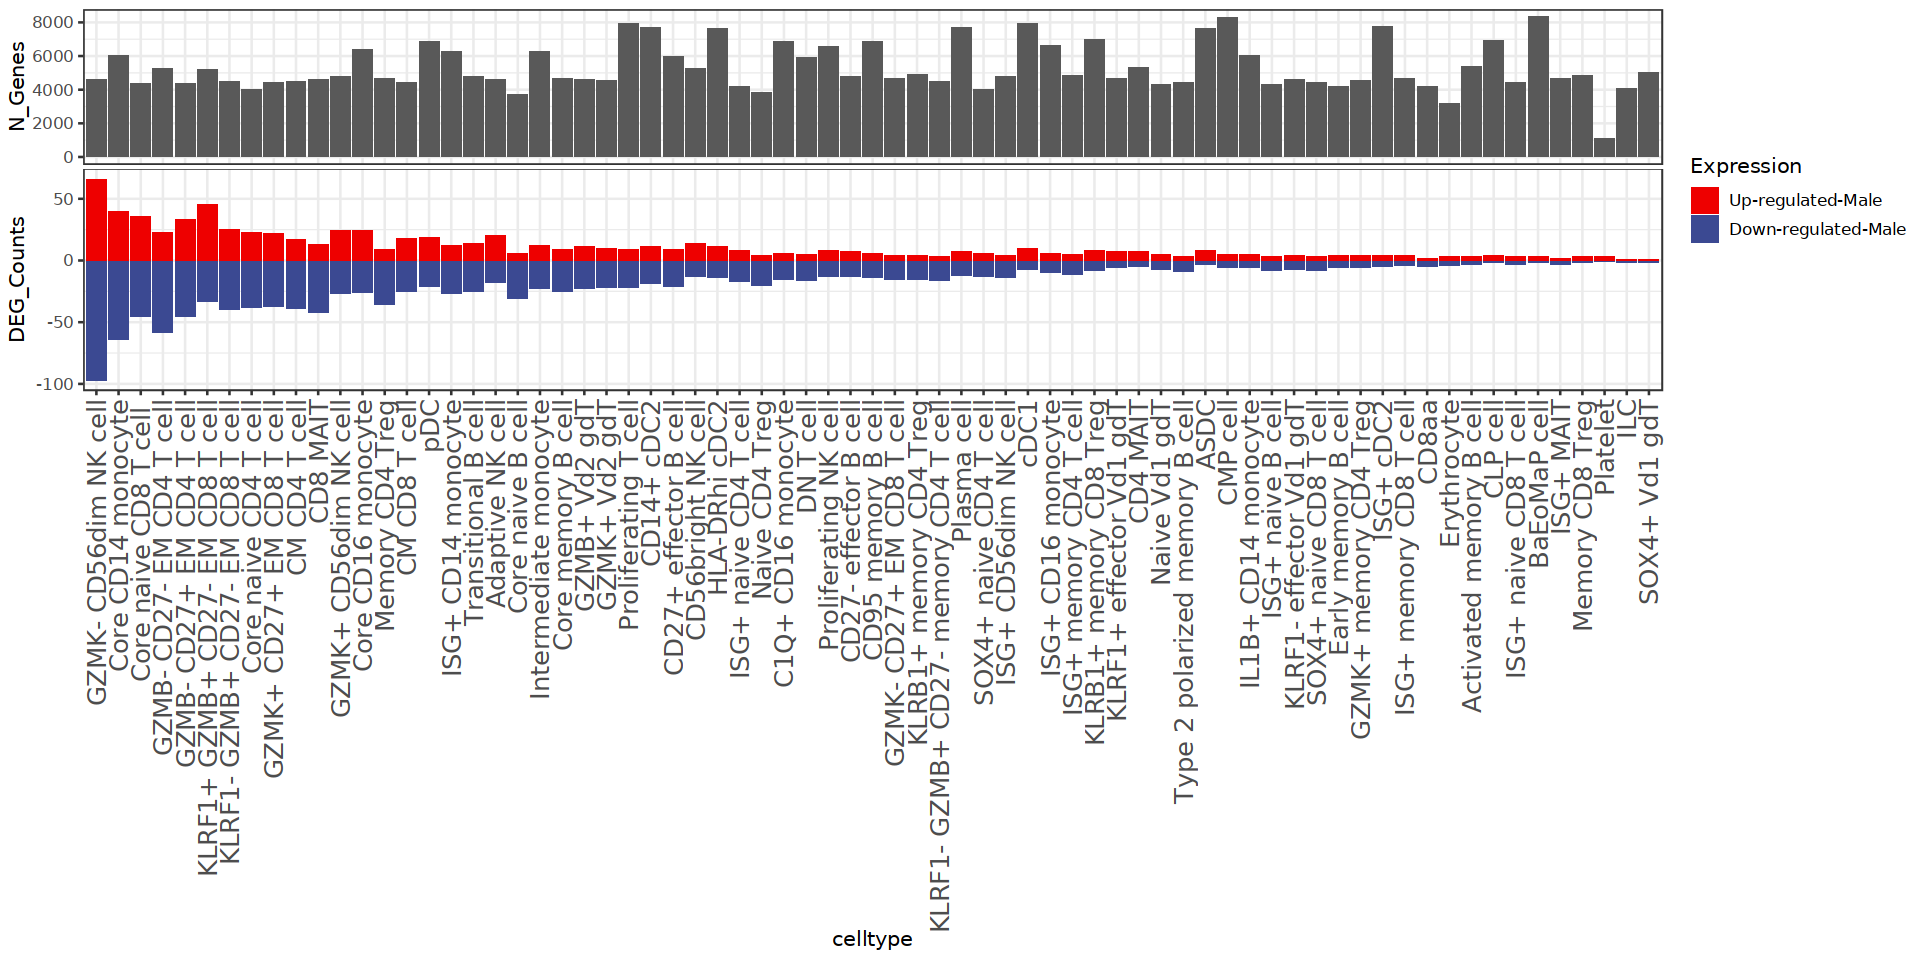

In [18]:
options(repr.plot.width = 16, repr.plot.height = 8)

p3<-p1 %>% insert_top(p2,height=0.7)

p3